In [21]:
from sklearn.datasets import make_classification

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube = False,class_sep=20
                         )

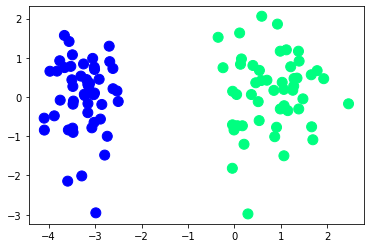

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [25]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [26]:
print(lor.intercept_)
print(lor.coef_)

[3.13649441]
[[2.36687798 0.02178765]]


In [27]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [28]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input+b

In [47]:
def gd(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    for i in range(2500):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:],weights[0]

In [48]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [49]:
coef_,intercept_ = gd(X,y)

In [50]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [51]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

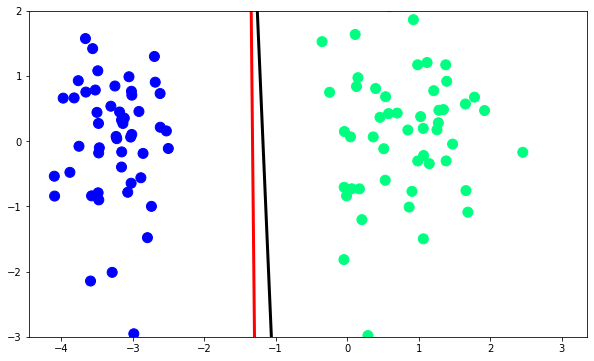

In [52]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)